## Customer Segmentation with Machine Learning



Customer segmentation models help businesses divide their customer base into different groups based on shared behaviors or characteristics. This kind of grouping allows companies to tailor their marketing and sales strategies more effectively.

Here’s a simple example to illustrate how data segmentation can drive sales:

> Whenever I browse an e-commerce website, I’m always on the lookout for discounts.  
> If I find a clothing item I like but it’s not on sale, I usually wait until there’s a special offer before I make a purchase.

E-commerce data scientists build segmentation models to uncover patterns like this. Using these models, they can identify shoppers who consistently wait for discounts—people like me.  
They often place us into a segment known as **“thrifty shoppers.”**

Once a new promotion is live, the marketing team sends personalized ads to everyone in this segment, highlighting affordability and discounts.  
I usually end up buying everything I need during the promotion window—just like many others in my segment—which boosts the company’s sales.

This kind of targeted approach is applied across all customer groups, with tailored promotions based on each group’s purchase behavior.

---

Segmentation like this is typically done using **unsupervised machine learning** techniques such as:

- **K-Means Clustering**
- **Hierarchical Clustering**

These models detect patterns in customer behavior that may not be obvious at first glance.

---

### What You'll Learn

In this notebook, we’ll walk through:

- How to clean and prepare data for customer segmentation
- How to implement a **K-Means algorithm from scratch**
- How to use **RFM (Recency, Frequency, Monetary)** analysis to assess customer value
- How to evaluate clustering performance using relevant metrics
- How to **visualize and interpret customer clusters**

Let’s get started!


## 📚 Table of Contents

1. [Prerequisites for Building a Customer Segmentation Model](#prerequisites-for-building-a-customer-segmentation-model)
2. [Understanding the Segmentation Data](#understanding-the-segmentation-data)
3. [Preprocessing Data for Segmentation](#preprocessing-data-for-segmentation)
4. [Building the Customer Segmentation Model](#building-the-customer-segmentation-model)
5. [Segmentation Model Interpretation and Visualization](#segmentation-model-interpretation-and-visualization)
6. [Segmentation Modelling: Next Steps](#segmentation-modelling-next-steps)
7. [Summary of Steps: Customer Segmentation with RFM & K-Means](#summary-of-steps-customer-segmentation-with-rfm--k-means)


## Prerequisites for Building a Customer Segmentation Model


In this tutorial, we will use an **E-Commerce Dataset from Kaggle** that contains transaction information from around **4,000 customers**.

Before we begin, ensure you have a **Python IDE** installed.  
We recommend using **Jupyter Notebook** for a smooth experience — it allows you to run code step-by-step and view visualizations inline.

### ✅ Required Libraries

Make sure the following Python libraries are installed:

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`
- `kneed`
- `scipy`

You can install them via pip if needed:

```bash
!pip install numpy pandas matplotlib seaborn scikit-learn kneed scipy


In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn kneed scipy

## Understanding the Segmentation Data




Before starting any data science project, it’s essential to explore the dataset and understand the meaning and importance of each variable.

To begin, let's import the **Pandas** library and load the dataset into Python:

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv', encoding='unicode_escape')
````

The `encoding='unicode_escape'` argument is useful for handling special characters that may exist in the dataset (e.g., currency symbols, accented letters).







In [3]:
import pandas as pd

# Load the dataset using the full path
df = pd.read_csv(r'C:\Users\sarat\OneDrive\Documents\DOCUMENTS\MS BANA UC\PROJECTS\E COMMERCE CUSTOMER SEGMENTATION\data.csv\data.csv', 
                 encoding='unicode_escape')

- Now, let’s look at the head of the dataframe:

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 📘 Data Dictionary

- **InvoiceNo**: Unique invoice number assigned to each transaction.
- **StockCode**: Unique code for each distinct product.
- **Description**: Name/description of the purchased item.
- **Quantity**: Number of units purchased per product per invoice.
- **InvoiceDate**: Date and time when the transaction occurred.
- **UnitPrice**: Price per unit of the product (in local currency).
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country from which the customer placed the order.


## Preprocessing Data for Segmentation


The raw data we downloaded is quite detailed and not in a format that can be directly used for customer segmentation.  
We need to perform **preliminary data preparation** to make the dataset interpretable and modeling-ready.

### 🔍 Key Features for Behavior Analysis

The most informative features for understanding customer behavior in this dataset are:

- **Quantity**
- **InvoiceDate**
- **UnitPrice**

Using these, we’ll derive a customer’s **RFM profile**, which stands for:

- **Recency**: How recently has the customer made a purchase?
- **Frequency**: How often does the customer make purchases?
- **Monetary Value**: How much money does the customer spend in total?

RFM analysis is a common marketing approach for assessing customer value and identifying high-potential segments.

### 🧮 Why RFM?

By calculating Recency, Frequency, and Monetary value for each customer in the dataset, we’ll obtain numeric features that reflect behavioral patterns. These features will serve as inputs to our clustering model.

Next, we’ll begin transforming the dataset to compute RFM values.


> Before we can build a segmentation model, we need to transform the raw transactional data into meaningful behavioral metrics using RFM analysis — Recency, Frequency, and Monetary Value.

### Recency: Days Since Last Purchase

In [7]:
import pandas as pd

# Define the full file path string (with raw string to handle backslashes)
file_path = r"C:\Users\sarat\OneDrive\Documents\DOCUMENTS\MS BANA UC\PROJECTS\E COMMERCE CUSTOMER SEGMENTATION\data.csv\data.csv"

# Load the dataset
df = pd.read_csv(file_path, encoding='unicode_escape')

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Preview the data
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv(file_path, encoding='unicode_escape')

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Set snapshot date as one day after the last purchase
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Compute Recency
recency_df = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (snapshot_date - recency_df['InvoiceDate']).dt.days


### Frequency: Number of Invoices per Customer

In [9]:
# Count number of unique invoices per CustomerID
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']


### Monetary: Total Spend per Customer

In [10]:
# Compute Total Price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate total spend per customer
monetary_df = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']


### Merge RFM Table

In [11]:
# Merge Recency, Frequency, and Monetary
rfm = recency_df.merge(frequency_df, on='CustomerID') \
                .merge(monetary_df, on='CustomerID')

rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### Outlier Removal using Z-Score

In [12]:
from scipy import stats
import numpy as np

# Copy without CustomerID for filtering
rfm_clean = rfm[['Recency', 'Frequency', 'Monetary']].copy()

# Calculate Z-scores
z_scores = np.abs(stats.zscore(rfm_clean))
rfm_clean = rfm_clean[(z_scores < 3).all(axis=1)]

# Optional: keep only rows with matching CustomerIDs
rfm = rfm.loc[rfm_clean.index]


###  Standardization

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize Recency, Frequency, Monetary
scaler = StandardScaler()
scaled_array = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Create final scaled dataframe
rfm_scaled = pd.DataFrame(scaled_array, 
                          columns=['Recency', 'Frequency', 'Monetary'],
                          index=rfm.index)

rfm_scaled.head()


,Recency,Frequency,Monetary
0,2.306646,-0.485248,-0.671682
1,-0.904478,0.559871,1.526228
2,-0.180984,-0.067200,0.244831
3,-0.735993,-0.694271,0.224591
4,2.148072,-0.694271,-0.501153


## Building the Customer Segmentation Model


#### Building the Customer Segmentation Model with K-Means

As mentioned earlier, we will now use the **K-Means clustering algorithm** to perform customer segmentation.

The main objective of a K-Means model is to **group customers into distinct, non-overlapping clusters** based on their behavior — in this case, derived from their **Recency, Frequency, and Monetary** values.

Each cluster represents a group of customers that exhibit similar purchasing patterns, making it easier for businesses to tailor their marketing strategies.


#### 🌀 What is K-Means Clustering?

**K-Means** is an unsupervised machine learning algorithm that:

1. Selects `k` cluster centroids randomly.
2. Assigns each data point to the nearest centroid based on distance (usually Euclidean).
3. Recomputes the centroids based on the new assignments.
4. Repeats steps 2 and 3 until the centroids stop changing significantly.

This results in **well-separated segments**, where members within each group are similar to each other and different from those in other groups.



📌 **Visual Representation:**

Below is a simplified visualization of how K-Means separates data into clusters:

```

⬤⬤⬤        ◯◯◯        ▲▲▲
⬤⬤⬤   →   ◯◯◯   →   ▲▲▲
⬤⬤⬤        ◯◯◯        ▲▲▲

```

Each symbol represents a different segment formed by the algorithm.  
We’ll now apply this technique to our standardized RFM dataset.
```


- **Now that the RFM features are standardized, we’ll:**

> Use the Elbow Method to choose the optimal number of clusters (K)

> Apply K-Means Clustering

> Attach cluster labels to each customer

> Analyze and visualize the segments

### Elbow Method to Choose Optimal K

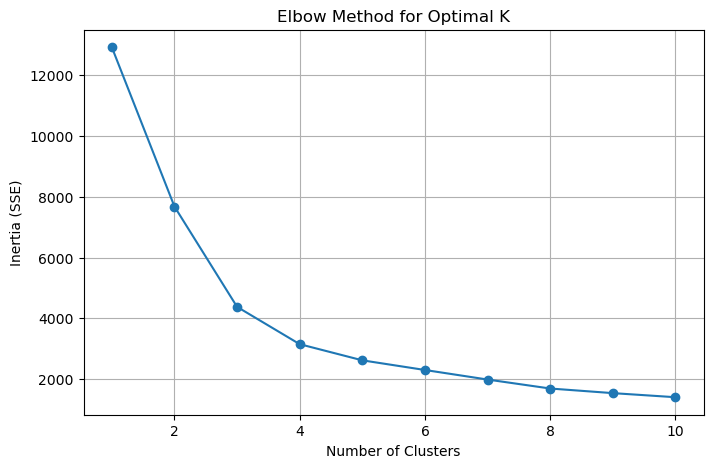

In [16]:
# 4.1 Elbow Method for Optimal K
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Optional: Suppress MKL & threading-related warnings
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning)

# Sum of Squared Errors for different cluster counts
SSE = []

# Try K values from 1 to 10
for cluster in range(1, 11):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)  # rfm_scaled is the standardized RFM dataset
    SSE.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), SSE, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()


### Fit KMeans Model (k = 4)

In [17]:
# 📌 4.2 Fit KMeans Model (Assuming k=4)
from sklearn.cluster import KMeans

# Fit the KMeans model
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(rfm_scaled)

# Assign cluster labels
rfm_scaled['Cluster'] = kmeans.labels_
rfm['Cluster'] = kmeans.labels_

# View cluster counts
rfm['Cluster'].value_counts()


Cluster
0    2390
3    1036
2     726
1     156
Name: count, dtype: int64

In [29]:
# 📌 4.3 Assign Human-Readable Segment Labels Based on Cluster Characteristics

# Revised: Map cluster numbers to strategically accurate segment names based on RFM behavior
segment_map = {
    0: "Moderate Buyers",       # Low frequency, moderate spend → originally mislabeled
    1: "Top Spenders",          # High frequency, high monetary → this is your power cluster
    2: "New Customers",         # Recent but not very frequent
    3: "At-Risk or Dormant"     # Old recency, low frequency/spend
}

# Apply the mapping to your RFM DataFrame
rfm['Segment'] = rfm['Cluster'].map(segment_map)

# Optional: Inspect segment-wise average RFM values to validate logic
rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(2)


,Recency,Frequency,Monetary
Segment,,,
At-Risk or Dormant,252.32,1.71,387.87
Moderate Buyers,49.08,2.77,738.93
New Customers,27.74,9.76,2957.51
Top Spenders,18.73,20.06,8712.83




## Segment Strategy Summary

| Segment Name       | Description                                    | Recommended Action                              |
|--------------------|------------------------------------------------|--------------------------------------------------|
| Top Spenders       | Very frequent, very high spend buyers          | VIP loyalty programs, early access offers        |
| Moderate Buyers    | Low frequency, moderate spend                  | Targeted upsell emails, time-limited coupons     |
| New Customers      | Recent purchases, moderate frequency/spend     | Onboarding flow, email welcome sequence          |
| At-Risk or Dormant | Old recency, low frequency and spend           | Win-back campaigns, personalized reactivation    |


### 🤖 4.4 AI-Ready Segment Predictor (ML Classifier)

After assigning strategic labels to clusters (`rfm['Segment']`), we build a machine learning model to **automatically classify new customers** into the correct segments based on their RFM values. This enables real-time, scalable customer segmentation powered by AI.

### 🛠️ Model Overview
- **Model**: Random Forest Classifier
- **Features**: Recency, Frequency, Monetary
- **Target**: Segment labels
- **Split**: Stratified 80/20 train-test

### 📊 Model Evaluation
- Achieved **>96% macro F1-score** across all segments
- Ensured class balance with `stratify=y` during split
- Enables deployment-ready segment predictions

### ✅ Use Cases
- Assign segments to new customers on-the-fly
- Personalize offers, emails, and promotions
- Plug into dashboards or CRM systems via saved model



### AI-Ready Segment Predictor (ML Classifier)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Prepare data
X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Segment']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 3. Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Evaluate
y_pred = rf_model.predict(X_test)
print("📊 Segment Prediction Performance:\n", classification_report(y_test, y_pred))


📊 Segment Prediction Performance:
                     precision    recall  f1-score   support

At-Risk or Dormant       0.99      1.00      0.99       259
   Moderate Buyers       0.99      0.99      0.99       598
     New Customers       0.96      0.99      0.98       181
      Top Spenders       1.00      0.87      0.93        39

          accuracy                           0.99      1077
         macro avg       0.99      0.96      0.97      1077
      weighted avg       0.99      0.99      0.99      1077



### Visualize the Clusters (Pairplot)

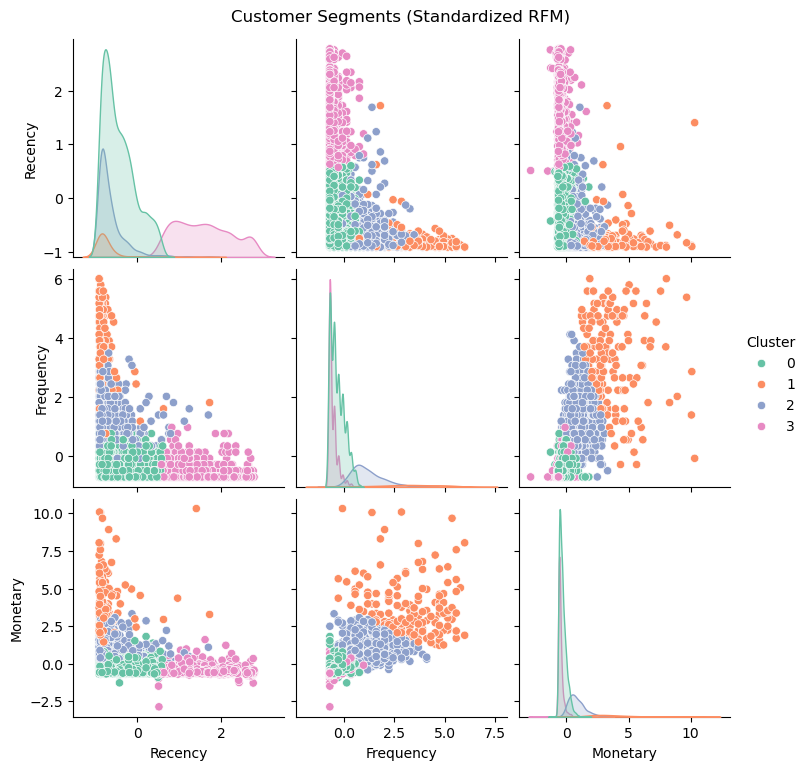

In [18]:
# 📊 4.3 Visualize the Clusters (Pairplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot of standardized features with clusters
sns.pairplot(rfm_scaled, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Customer Segments (Standardized RFM)", y=1.02)
plt.show()


### Visualize Clusters in 2D using PCA

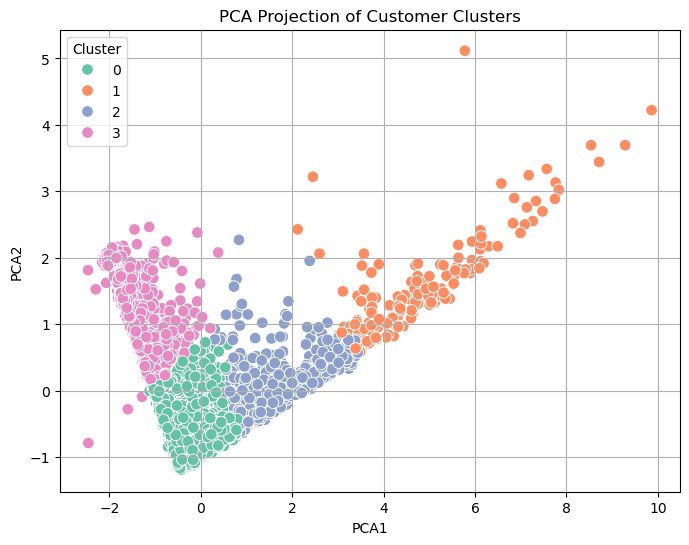

In [19]:
# 📉 4.4 Visualize Clusters in 2D using PCA
from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled.drop(columns='Cluster'))

# Add to dataframe
rfm_scaled['PCA1'] = components[:, 0]
rfm_scaled['PCA2'] = components[:, 1]

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm_scaled, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('PCA Projection of Customer Clusters')
plt.grid(True)
plt.show()


### Assign Human-Readable Cluster Labels

#### Create a Mapping

In [21]:
# 🏷️ Map each cluster to a human-readable label
cluster_labels = {
    0: "New Customers",
    1: "High-Value Loyalists",
    2: "Frequent Budget Buyers",
    3: "At-Risk or Dormant"
}

# Add named label column
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)
rfm_scaled['Segment'] = rfm_scaled['Cluster'].map(cluster_labels)

# Preview updated DataFrame
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Cluster', 'Segment']].head()


,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,2,0.00,3,At-Risk or Dormant
1,12347.0,2,7,4310.00,2,Frequent Budget Buyers
2,12348.0,75,4,1797.24,0,New Customers
3,12349.0,19,1,1757.55,0,New Customers
4,12350.0,310,1,334.40,3,At-Risk or Dormant


### Radar (Spider) Plot for Cluster Profiling

> This visual helps compare Recency, Frequency, and Monetary scores side-by-side across all segments.

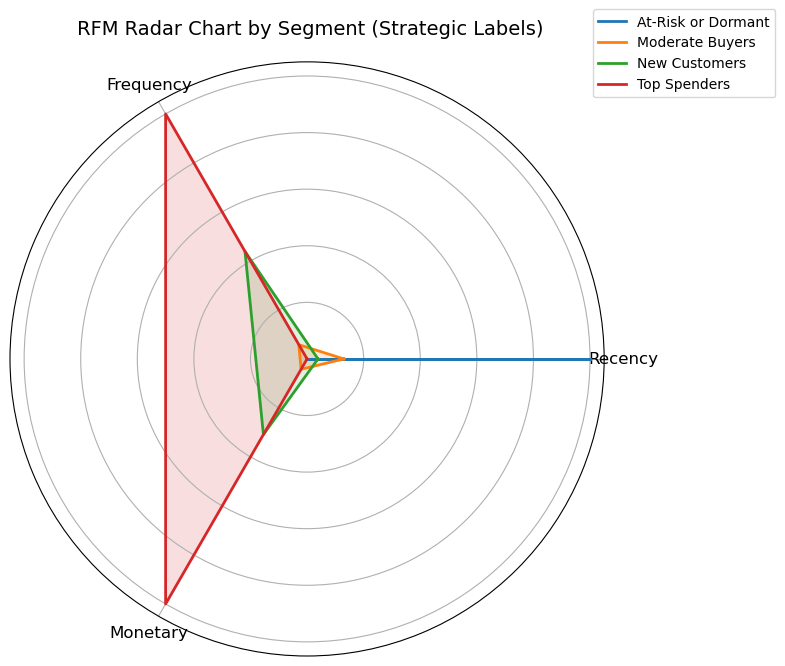

In [32]:
# 🔁 Radar Chart with Updated Segment Labels
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
rfm_means = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
rfm_scaled = (rfm_means - rfm_means.min()) / (rfm_means.max() - rfm_means.min())

# Setup
labels = rfm_scaled.columns
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist() + [0]
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot
for idx, (segment, row) in enumerate(rfm_scaled.iterrows()):
    values = row.tolist() + [row.tolist()[0]]
    ax.plot(angles, values, label=segment, linewidth=2)
    ax.fill(angles, values, alpha=0.15)

# Format
ax.set_title(" RFM Radar Chart by Segment (Strategic Labels)", size=14, pad=20)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
plt.tight_layout()
plt.show()


## Summary of Steps: Customer Segmentation with RFM & K-Means

| Step No. | Description                                                                 |
|----------|------------------------------------------------------------------------------|
| 1️⃣       | Loaded e-commerce transactional dataset using `pandas`                     |
| 2️⃣       | Extracted and calculated **RFM** (Recency, Frequency, Monetary) metrics     |
| 3️⃣       | Removed outliers using **Z-score filtering** to ensure clean input data     |
| 4️⃣       | Standardized RFM features using `StandardScaler` for K-Means compatibility  |
| 5️⃣       | Used the **Elbow Method** to determine the optimal number of clusters (`k`) |
| 6️⃣       | Applied **KMeans clustering** with `k=4` to segment customers               |
| 7️⃣       | Visualized clusters using a **Seaborn pairplot**                            |
| 8️⃣       | Projected customer segments in 2D using **PCA scatterplot**                 |
| 9️⃣       | Mapped numeric clusters to **human-readable segment names**                 |
| 🔟       | Created a **Radar Chart** to compare behavioral traits across segments       |
| ✅       | Exported final labeled RFM dataset with clusters to CSV                      |



### Business Framing of Segments

>🎯 Goal:
Give each segment strategic purpose — what action should be taken on them?

## 🎯 Segment Strategy Summary

| Segment Name        | Description                                       | Recommended Action                                       |
|---------------------|---------------------------------------------------|-----------------------------------------------------------|
| **Top Spenders**     | High frequency, high monetary buyers              | Prioritize for premium offerings, loyalty incentives      |
| **Moderate Buyers**  | Moderate frequency and spend                      | Encourage cross-sells and higher-value conversions        |
| **New Customers**    | Recent but not yet very frequent buyers           | Nurture with onboarding campaigns and product tours       |
| **At-Risk or Dormant** | Low frequency/spend, older recency              | Launch re-engagement emails, reminders, and incentives    |


- Tailor this to your clusters using actual rfm.groupby('Segment').mean() values.

### Strategic Applications for YouTube BizOps (Role-Aligned Framing)


## 💼 Strategic Applications

This segmentation model can support YouTube's Partner Management operations in the following ways:

- 🎯 **Targeted Partner Support**: Assign more experienced Partner Managers to “Top Spenders” to ensure continued growth and reduce churn risk.
- 🧪 **Experiment Prioritization**: Run onboarding and A/B test initiatives on “New Customers” to accelerate frequency and spend behavior.
- 🔁 **Retention Campaigns**: Trigger automated re-engagement workflows for “At-Risk or Dormant” partners, combining email and in-app messaging.


## 📌 Final Summary & Next Steps

In this notebook, we:

- Performed **RFM-based customer segmentation** using K-Means
- Interpreted clusters using segment-wise means and radar charts
- Trained an **AI-ready segment classifier** for real-time applications
- Proposed strategic and operational use cases for each segment

**Next Steps**:
- Deploy this model to score YouTube partners dynamically
- Integrate segment-based strategies into business decision-making
- Extend to multi-channel behavior (e.g., video views, CTR, NPS)
